### Objectives:

- To plot the empirical and the theoretical distribution of the overall data without regard to classes.
- To plot the empirical and the theoretical distribution of the data of each class.

In this homework, we will look at how python can be used to analyze data using the pandas data analysis package, and how we can model data using probability distributions studied in class.

We will be using a data file which has been extracted from the Iris Flower Data Set, which is perhaps the best known database to be found in the pattern recognition literature. The original dataset consists of 50 samples from each of three species of Iris (setosa, versicolor and virginica). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. For more information, please see the following page at the UCI Machine Learning Repository: 

https://archive.ics.uci.edu/ml/datasets/iris

In this problem, we will be working with a smaller dataset, which consideres only two types of irises: setosa and virginica, and one random variable: petal length.

Download the file "iris petal length.xlsx" from Canvas to complete the homework. 

We recommend you use the pandas package, the numpy package and the scipy and matplotlib.pyplot libraries in python, as you have done in previous homeworks. 

After you have completed the notebook, export it as pdf for submission. You can do this in one of two ways:
1. Go to File, click Download as, click PDF via LaTeX (.pdf).
2. Go to File, click Download as, click HTML (.html), then convert the html file to pdf file.

We first load the datafile using the **pandas.read_excel** function into a **pandas.DataFrame**. 

In [1]:
# load pandas, a data analysis package
# load numpy, a scientific computing package
# load scipy.stats, a module contains probability functions
# load matplotlib.pyplot, a framework provides a Matlab-like plotting
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

data = pd.read_excel('iris petal length.xlsx',index_col = 'Index')

There are 100 entries in total in this data set.  The first 50 entries contains measurements of petal length from irises in the  **setosa** class. We can see a few examples using the **pandas.DataFrame.head** function, which returns the **first** few entries in the data frame.

In [2]:
data.head()

,Petal length,Class
Index,,
1,1.4,Iris-setosa
2,1.4,Iris-setosa
3,1.3,Iris-setosa
4,1.5,Iris-setosa
5,1.4,Iris-setosa


The last 50 entries contain measurements of the petal length from irises in the **virginica** class.  We can can see a few examples using the **pandas.DataFrame.tail** function, which returns the **last** few entries in the data frame.

In [3]:
data.tail()

,Petal length,Class
Index,,
96,5.2,Iris-virginica
97,5.0,Iris-virginica
98,5.2,Iris-virginica
99,5.4,Iris-virginica
100,5.1,Iris-virginica


From these lines, you should get the general idea that the petals of virginica irises are generally longer than the petals of setosa irises. Thus, if you observe an iris with longer petals, it is "more likely" to be a virginica than a setosa. Similarly, if you observe an iris with shorter petals, it is "more likely" to be a setosa. This assignment makes this intuition more precise using probability theory.

**Part a:** Plot the normalized histogram of the petal length for all the data without regard to which species from 0 to 7 with bin size 0.2. The normalized histogram is the count in each bin divided by the number of observations and divided by the bin width. In python, this can be selected by passing "density=True" into the **matplotlib.pyplot.hist** or **pandas.DataFrame.hist** functions.

Text(0.5, 0, 'Petal Lengths')

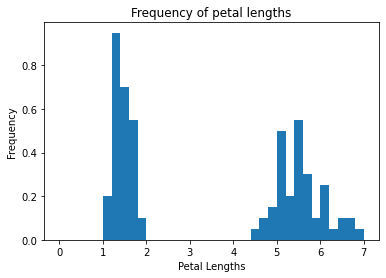

In [4]:
# put your code here
fig, ax = plt.subplots()
b = np.arange(0,7 + 0.2 ,0.2)
data['Petal length'].plot.hist(bins = b, density = True)
ax.set_title("Frequency of petal lengths")
  
# adding labels
ax.set_xlabel('Petal Lengths')



**Part b:** Calculate empirical mean $m$ and standard deviation $\sigma$ of the petal length over all of the data without regard to species. For a set of data $\{r_1,r_2,⋯,r_n\}$, the empirical mean is given by 

$m=\frac{1}{n}\sum_{i=1}^{n}r_i$

and the empirical standard deviation is given by 

$\sigma=\sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(r_i-m)^2}$

If you have read the data in using the pandas package, then you can compute the mean and standard deviation easily using the **pandas.DataFrame.mean** and **pandas.DataFrame.std** functions.

In [5]:
# put your code here

m = data['Petal length'].mean()
std = data['Petal length'].std()

print(f'The mean is: {round(m,3)}')
print(f'The standard deviation is: {round(std,3)}')

The mean is: 3.508
The standard deviation is: 2.094


**Part c:** Assume that the probability density function of the petal length, $f_X(x)$, is given by a Gaussian distribution with mean and standard deviation computed in **Part b**. You can compute values of the Gaussian distribution in python using the **scipy.stats.norm.pdf** function. Note that the Gaussian distribution is also called the normal distribution.

Compare the normalized histogram in **Part a** with the plot of $f_X(x)$ by plotting both together in the same figure for $x$ from 0 to 7. Does this look like a good model of the data? 

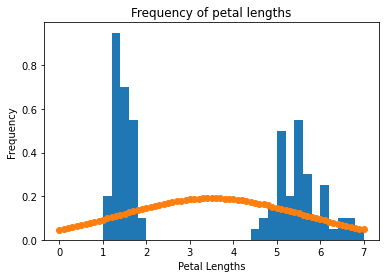

In [6]:
# put your code here

fig, ax = plt.subplots()
x = np.arange(0,7 + 0.1 ,0.1)
data['Petal length'].plot.hist(bins = b, density = True)
f_x = scipy.stats.norm.pdf(x,loc = m,scale = std)
ax.set_title("Frequency of petal lengths")
ax.plot(x, f_x, '-o', label = "f_x(x)")

# adding labels
ax.set_xlabel('Petal Lengths')
plt.show()


**Part c Answer:**  

**Part d:** Now generate plots of normalized histogram of the petal length for each species separately. You can separate data into different groups using the **pandas.DataFrame.groupby** command. Then for each group, you can use the **pandas.DataFrame.hist** command to plot the histogram.

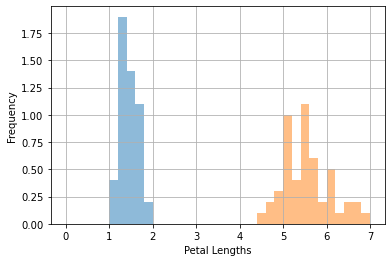

In [7]:
# put your code here

groups = data.groupby('Class')['Petal length']
fig, ax = plt.subplots()
for name,group in groups:
    group.hist(bins = b, density = True, label = name, alpha = 0.5, ax = ax)

ax.set_xlabel('Petal Lengths')
ax.set_ylabel('Frequency')
plt.show()



**Part e:** Use your knowledge of probability to model probability distributions of the petal lengths given setosa and virginica, $f_{X|species}(x|setosa)$ and $f_{X|species}(x|virginica)$. For each species, compare the normalized histogram with the conditional density by plotting them both in the same figure for $x$ from 0 to 7. 

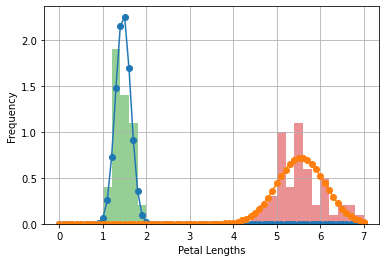

In [8]:
# put your code here
#add the old histograms here for a total of 4 histograms

m_by_class = groups.mean()
std_by_class = groups.std()
x = np.arange(0,7 + 0.1 ,0.1)
f_x_setosa = scipy.stats.norm.pdf(x, loc = m_by_class['Iris-setosa'], scale = std_by_class['Iris-setosa'])
f_x_virginica = scipy.stats.norm.pdf(x, loc = m_by_class['Iris-virginica'], scale = std_by_class['Iris-virginica'])
fig, ax = plt.subplots()
ax.plot(x, f_x_setosa, '-o', label = "f_x|setosa")
ax.plot(x, f_x_virginica, '-o', label = "f_x|virginica")
for name,group in groups:
    group.hist(bins = b, density = True, label = name, alpha = 0.5, ax = ax)
ax.set_xlabel('Petal Lengths')
ax.set_ylabel('Frequency')
plt.show()




**Part f:** Use the total probability theorem to combine the two conditional densities $f_{X|species}(x|setosa)$ and $f_{X|species}(x|virginica)$ to obtain a new model distribution for the petal length, $g_X(x)$. Compare the plot of $g_X(x)$ with the normalized histogram in **Part a** by plotting both in the same figure for x from 0 to 7. How does this compare with the single Gaussian assumption in part **Part c**?

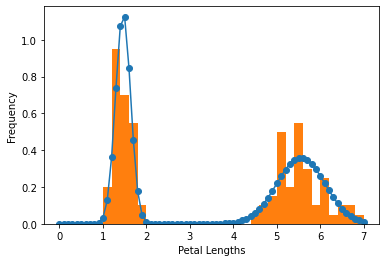

In [9]:
# put your code here

n_total = 100
n_petals = data.groupby('Class')['Petal length'].count()
# print('Prob of petals', n_petals/ n_total)
# using print it was found the prob of the different petals is 0.5
gx = f_x_setosa * 0.5 + f_x_virginica * 0.5
fig, ax = plt.subplots()
ax.plot(x, gx, '-o', label = "g_x(x)")
data['Petal length'].plot.hist(bins = b, density = True)
ax.set_xlabel('Petal Lengths')
ax.set_ylabel('Frequency')
plt.show()



**Part f Answer:** 

In [10]:
# Plotting part f with part c shows how part c is very innacurate. 
# The graph with total probability theorm fits much better 